# 階層的クラスタリング
融合法に基づく階層的クラスタリングを実装してみた。

TODO
- クラスタ間距離の定義
- 距離行列の更新をもうちょっとサボる

In [1]:
# !pip install -U tqdm

In [2]:
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
from scipy.spatial import distance
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [3]:
def pca(X, target):
    pca = PCA(n_components=2, whiten=True)
    X_trans = pca.fit_transform(X)
    
    plt.scatter(X_trans[:, 0], X_trans[:, 1], c=target)
    plt.show()
    
def show_clusters(clusters):
    data = np.array(sum(clusters, []))
    labels = np.array(sum([[str(i)]*len(cluster) for i, cluster in enumerate(clusters)], []))
    pca(data, labels)

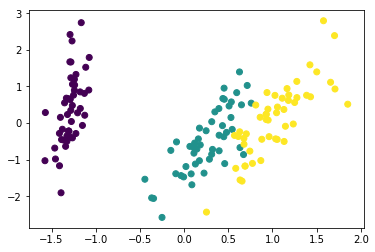

In [4]:
data, target = load_iris(return_X_y=True)
pca(data, target)

In [5]:
def single_linkage(A, B, distance):
    d = float('inf')
    for a in A:
        for b in B:
            d = min(d, distance(a, b))
    return d

def complete_linkage(A, B, distance):
    d = -float('inf')
    for a in A:
        for b in B:
            d = max(d, distance(a, b))
    return d

def group_average(A, B, distance):
    # TODO: 実装
    return d

def ward(A, B, distance):
    # TODO: 実装
    return d

def median(A, B, distance):
    # TODO: 実装
    return d

def centroid(A, B, distance):
    # TODO: 実装
    return d

In [ ]:
def hierarchical_clustering(X, k=3, distance=distance.euclidean, method=single_linkage):
    clusters = [[X[i]] for i in range(len(X))]  # 各サンプルをクラスタとみなす
    n_updates = len(clusters) - k
    pbar = tqdm(total=n_updates)
    while len(clusters) > k:
        # TODO: 距離行列をつくりなおしではなく更新にする
        D = distance_matrix(clusters, distance=distance, method=method)
        a_index, b_index = np.unravel_index(np.nanargmin(D), D.shape)

        assert b_index > a_index
        b = clusters.pop(b_index)
        a = clusters.pop(a_index)
        clusters.append(a+b)
        
        # 進捗表示
        pbar.update(1)
    pbar.close()
    return clusters

def distance_matrix(clusters, distance, method):
    D = np.zeros((len(clusters), len(clusters)))
    D[:, :] = np.nan
    for i in range(len(clusters)-1):
        for j in range(i+1, len(clusters)):
            A = clusters[i]
            B = clusters[j]
            d = method(A, B, distance)
            D[i, j] = d
    return D

In [ ]:
clusters = hierarchical_clustering(data, k=3, distance=distance.euclidean, method=complete_linkage)
show_clusters(clusters)

 80%|████████  | 118/147 [00:28<00:06,  4.55it/s]